# Linear Regression

In this assignment we will try to define a linear relationship between the **input variable (X)**  and **output variable(Y)**. The input variable have multiple attributes, say ***n***. Then we can define a linear model as,

$$ Y = \beta_0 + \beta_1 x_1 + ... + \beta_n x_n $$

where $\beta_0$ is the bias term. We can write the above expression as,

$$ Y = \beta_0 x_0 + \beta_1 x_1 + ... + \beta_n x_n $$

where $x_0 = 1$. Thus we can write an equivalent of the equation in a matrix form.

$$ Y = \beta^T X $$

where $\beta = [\beta_0 , \beta_1, ... , \beta_n]^T $ and $ X = [x_0, x_1, ... , x_n]^T $

To model the above linear model, we would need a hypothesis function. Let us define our hypothesis function as, 

$$ h_\beta(x) = \beta^Tx $$

We now need a cost function to estimate the error in our model. So let our cost function be defined as,

$$ J(\beta) = \frac{1}{2m} \sum_{i=1}^{m}(h_\beta(x^{(i)}) - y^{(i)})^2$$

By minimizing the cost we can find the coefficients $\beta$. We will be using ***Gradient Descent*** method for this.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
data = load_boston()

print data.data.shape

(506, 13)


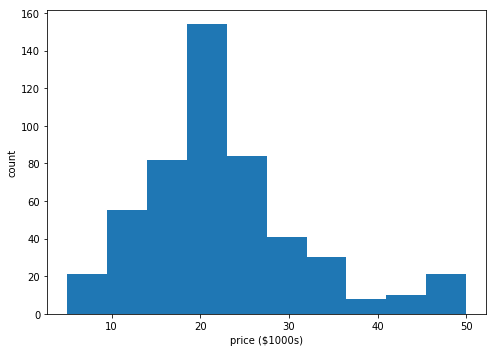

In [3]:
# Ploting the scores as scatter plot
plt.figure(figsize=(7,5))
plt.hist(data.target)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout()

In [4]:
# splitting the dataset into train and test datasets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

print "X_train shape =", X_train.shape
print "y_train shape =", y_train.shape

print "X_test shape =", X_test.shape
print "y_test shape =", y_test.shape


X_train shape = (379, 13)
y_train shape = (379,)
X_test shape = (127, 13)
y_test shape = (127,)


In [5]:
m = len(X_train)
x0 = np.ones((m,1))
X = np.hstack((x0,X_train))
Y = np.array(y_train)
B = np.array(np.zeros(14))
alpha = 1e-7

In [6]:
# Cost function

def cost_function(X,Y,B):
    m = len(Y)
    J = np.sum((np.matmul(X,B) - Y)**2) / (2*m)
    return J

In [7]:
cost_initial = cost_function(X,Y,B)
print cost_initial

298.361015831


We see that our initial cost of the model is high so we will use gradient descent method to reduce the cost.

*** Hypothesis *** = $ h_\beta(x) = \beta^Tx $

*** Loss *** = $ h_\beta(x) - y $

*** Gradient *** = $ (h_\beta(x) - y)x_i $

*** Gradient Descent Updation *** = $ \beta_i:= \beta_i - \alpha((h_\beta(x) - y)x_i) $

In [8]:
def Grad_descent(X,Y,B,alpha,iterations):
    cost = [0]*iterations
    m = len(Y)
    for i in range(iterations):
        hypo = np.matmul(X,B)
        loss = hypo - Y
        grad = np.matmul(loss,X)/m
        B = B - (alpha * grad)
        J = cost_function(X, Y, B)
        cost[i] = J
    return B, cost
        

In [9]:
finalB, finalCost = Grad_descent(X,Y,B,alpha,100000)

print "Final Beta = ", finalB

print "final cost = ", finalCost[-1]

Final Beta =  [ 0.00555879 -0.07363869  0.13714733 -0.03204413  0.00420894  0.00181696
  0.06640869  0.06212129  0.01074779  0.00143493  0.00262743  0.0502426
  0.04750548 -0.18932836]
final cost =  30.4429502197


In [10]:
# Model evaluation - MSE
def rmse(Y_actual, Y_predicted):
    error = np.sqrt(sum((Y_actual - Y_predicted) ** 2) / len(Y_actual))
    return error

n = len(X_test)
x0 = np.ones((n,1))
X_test = (np.hstack((x0,X_test)))

Y_predicted = np.matmul(X_test,finalB)

print " Error(RMSE) = ", rmse(y_test,Y_predicted)

 Error(RMSE) =  8.41947930199


# Observations -

| s.no | No. of Iterations | learning_rate (alpha) | Error (RMSE)|
|:---:|:-------:|:------:|:-----:|:----:|
|1| 1000 | 1e-5 | nan|
|2|1000| 1e-6 | 8.753|
|3|1000| 1e-7 | 7.938 |
|4| 1000| 1e-8 | 9.614|
|5|10000|1e-5 | nan|
|6| 10000| 1e-6 | 7.703|
|7| 10000| 1e-7 | 8.607 |
|8| 100000| 1e-5 | nan |
|9| 100000| 1e-6 | 6.680 |
|10| 100000| 1e-7 | 8.419 |

We observe that the learning rate must be very low i.e atleast 1e-6 to achieve any result. We also observe that the error term oscillates this is due to the gradient descent function which is being used to reduce the loss incurred by the model.

The error for 100000 iterations and learning rate 1e-6 is 6.680 which is close to the actual error 5.045 when linear regression is performed on the boston housing dataset using scikit learn package.
